In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [51]:
def Cumulative(lists):
    cu_list = []
    length = len(lists)
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)]
    return cu_list[1:]

In [69]:
def generate_dfs(df):
    mo = df[df['Operator Type']=='Municipal Owned'].reset_index(drop=True)
    io = df[df['Operator Type']=='Investor Owned'].reset_index(drop=True)
    po = df[df['Operator Type']=='Privately Owned'].reset_index(drop=True)
    co = df[df['Operator Type']=='Cooperative'].reset_index(drop=True)
    dfs = [mo,io,po,co,df]
    return dfs

In [153]:
mmiles = pd.read_csv('PHMSA_Cleaned_Data/PHMSA_Main_Mileage_2020.csv',index_col=0)

In [159]:
mmiles.State.unique()

array(['KS', 'LA', 'GA', 'TN', 'AL', 'AK', 'MO', 'IL', 'IA', 'NE', 'OK',
       'TX', 'PA', 'MN', 'AR', 'KY', 'OH', 'MS', 'MI', 'IN', 'FL', 'WY',
       'VA', 'MD', 'SC', 'NY', 'AZ', 'MA', 'NC', 'WV', 'OR', 'WA', 'CO',
       'DE', 'WI', 'CA', 'CT', 'NM', 'NJ', 'HI', 'ND', 'ID', 'MT', 'SD',
       'UT', 'RI', 'ME', 'NH', 'PR', 'NV', 'VT', 'DC'], dtype=object)

In [92]:
def get_statewide_mileage(sa):
    mmiles = pd.read_csv('PHMSA_Cleaned_Data/PHMSA_Main_Mileage_2020.csv',index_col=0)
    temp_df = mmiles[mmiles.State==sa].reset_index(drop=True)
    dfs = generate_dfs(temp_df)
    dfnames = ['Municipal Owned','Investor Owned','Privately Owned','Cooperative','Total']
    finals = []
    for i in range(5):
        tot = ['Statewide Total','',dfnames[i],sa]
        sums1 = [sum(dfs[i]['Total Main Miles'])]
        try:
            sums2 = [sum(dfs[i]['Main Mileage Average Age'])/len(dfs[i])]
        except:
            sums2 = [0]
        sums3 = [sum(dfs[i]['Main Miles over 50 Years Old'])]
        mt = [int(sum(dfs[i][col])) for col in temp_df.columns[7:]]
        data = tot+sums1+sums2+sums3+mt
        finals.append(data)
    for i in range(5):
        temp_df.loc[len(temp_df.index)] = finals[i]
    temp_df = temp_df.iloc[::-1].reset_index(drop=True)
    temp_df.columns = ['Operator Name', 'Operator ID', 'Operator Type', 'State','Total Main Miles', 'Main Mileage Average Age','Main Miles over 50 Years Old', 'Main Miles Built in Unknown Decade','Pre-1940', '1940-49', '1950-59', '1960-69', '1970-79', '1980-89', '1990-99', '2000-09', '2010-19', '2020-29']
    return temp_df

In [143]:
def get_statewide_services(sa):
    srvs = pd.read_csv('PHMSA_Cleaned_Data/PHMSA_Services_2020.csv',index_col=0)
    temp_df = srvs[srvs.State==sa].reset_index(drop=True)
    dfs = generate_dfs(temp_df)
    dfnames = ['Municipal Owned','Investor Owned','Privately Owned','Cooperative','Total']
    finals = []
    for i in range(5):
        tot = ['Statewide Total','',dfnames[i],sa]
        sums1 = [int(sum(dfs[i][col])) for col in temp_df.columns[4:]]
        data = tot+sums1
        finals.append(data)
    for i in range(5):
        temp_df.loc[len(temp_df.index)] = finals[i]
    temp_df = temp_df.iloc[::-1].reset_index(drop=True)
    return temp_df

In [93]:
def get_statewide_hazleaks(sa):
    hazlks = pd.read_csv('PHMSA_Cleaned_Data/PHMSA_Hazardous_Leaks_2010_2020.csv',index_col=0)
    temp_df = hazlks[hazlks.State==sa].reset_index(drop=True)
    years = temp_df.columns[4:]
    temp_df['Total Hazardous Leaks (2010-2020)'] = [sum(temp_df.iloc[i,4:]) for i in temp_df.index]
    temp_df = temp_df.filter(['Operator ID','Operator Name','Operator Type','State','Total Hazardous Leaks'] + list(years))
    dfs = generate_dfs(temp_df)
    dfnames = ['Municipal Owned','Investor Owned','Privately Owned','Cooperative','Total']
    finals = []
    for i in range(5):
        tot = ['','Statewide Total',dfnames[i],sa]
        hl = [int(sum(dfs[i][col])) for col in temp_df.columns[4:]]
        data = tot + hl
        finals.append(data)
    for i in range(5):
        temp_df.loc[len(temp_df.index)] = finals[i]
    temp_df = temp_df.iloc[::-1].reset_index(drop=True)
    return temp_df

In [124]:
def get_statewide_totleaks(sa):
    hazlks = pd.read_csv('PHMSA_Cleaned_Data/PHMSA_Total_Leaks_2010_2020.csv',index_col=0)
    temp_df = hazlks[hazlks.State==sa].reset_index(drop=True)
    years = temp_df.columns[4:]
    temp_df['Total Leaks (2010-2020)'] = [sum(temp_df.iloc[i,4:]) for i in temp_df.index]
    temp_df = temp_df.filter(['Operator ID','Operator Name','Operator Type','State','Total Leaks'] + list(years))
    dfs = generate_dfs(temp_df)
    dfnames = ['Municipal Owned','Investor Owned','Privately Owned','Cooperative','Total']
    finals = []
    for i in range(5):
        tot = ['','Statewide Total',dfnames[i],sa]
        hl = [int(sum(dfs[i][col])) for col in temp_df.columns[4:]]
        data = tot + hl
        finals.append(data)
    for i in range(5):
        temp_df.loc[len(temp_df.index)] = finals[i]
    temp_df = temp_df.iloc[::-1].reset_index(drop=True)
    return temp_df

In [125]:
sa = get_statewide_totleaks('CA')
sa.head()

,Operator ID,Operator Name,Operator Type,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,,Statewide Total,Total,CA,25619,21714,41765,46269,58935,69695,61780,62273,71234,72909,73434
1,,Statewide Total,Cooperative,CA,0,0,0,0,0,0,0,0,0,0,0
2,,Statewide Total,Privately Owned,CA,120,113,93,7,42,49,20,18,34,36,17
3,,Statewide Total,Investor Owned,CA,25005,21153,41272,45708,58481,69281,61421,61973,70945,72589,73150
4,,Statewide Total,Municipal Owned,CA,494,448,400,554,412,365,339,282,255,284,267


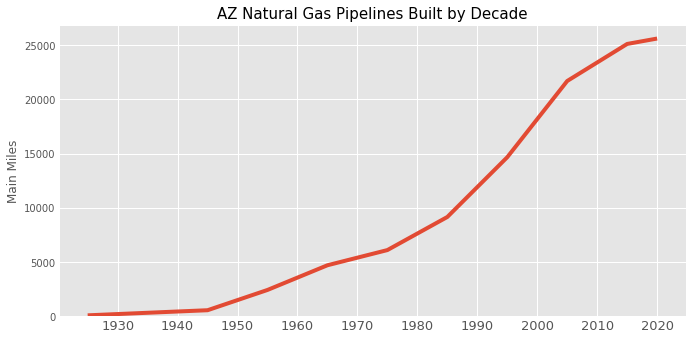

In [145]:
s = 'AZ'
sa = get_statewide_mileage(s)
plt.figure(figsize = (10,5))
miles = list(sa.iloc[0,8:])
unk = sa.iloc[0,7]/len(miles)
miles = [i+unk for i in miles]
miles = Cumulative(miles)
ages = [1925,1945,1955,1965,1975,1985,1995,2005,2015,2020]
plt.plot(ages, miles)
plt.ylabel('Main Miles')
plt.xticks(range(1930,2030,10), fontsize=13)
plt.ylim(0,)
plt.title(s + ' Natural Gas Pipelines Built by Decade', fontsize=15)
plt.show()

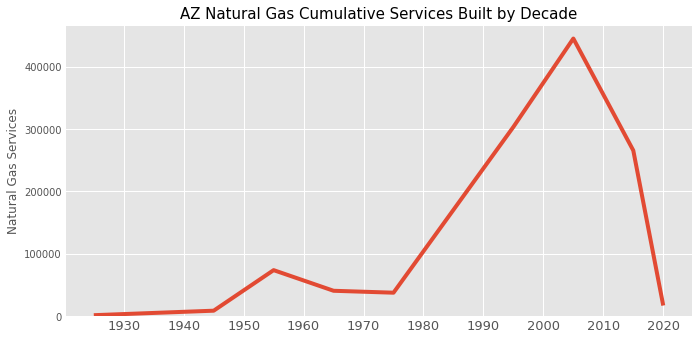

In [152]:
s = 'AZ'
sa = get_statewide_services(s)
plt.figure(figsize = (10,5))
servs = list(sa.iloc[0,6:])
unk = sa.iloc[0,5]/len(servs)
servs = [i+unk for i in servs]
#servs = Cumulative(servs)
ages = [1925,1945,1955,1965,1975,1985,1995,2005,2015,2020]
plt.plot(ages, servs)
plt.ylabel('Natural Gas Services')
plt.xticks(range(1930,2030,10), fontsize=13)
plt.ylim(0,)
plt.title(s + ' Natural Gas Cumulative Services Built by Decade', fontsize=15)
plt.show()

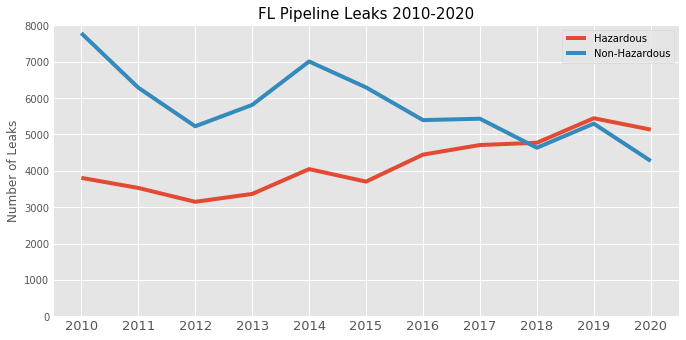

In [138]:
s = 'FL'
sa = get_statewide_hazleaks(s)
sa2 = get_statewide_totleaks(s)
plt.figure(figsize = (10,5))
hazleaks = list(sa.iloc[0,4:])
totleaks = list(sa2.iloc[0,4:])
totleaks = [totleaks[i] - hazleaks[i] for i in range(len(totleaks))]
years = range(2010,2021)
plt.plot(years, hazleaks,label='Hazardous')
plt.plot(years, totleaks, label='Non-Hazardous')
plt.ylabel('Number of Leaks')
plt.xticks(years, fontsize=13)
plt.title(s + ' Pipeline Leaks 2010-2020', fontsize=15)
plt.ylim(0,)
plt.legend()
plt.show()
plt.close()